### Ingest and Translate MTRduino Field Data

python: >= 3.7   
author: bell

Current setup has 5 samples for each 10min measurement.   
Calibration constants are determined prior to (and occasionally post) deployment.

In [160]:
import pandas as pd
import numpy as np

%matplotlib inline


In [161]:
infile = '/Users/bell/Downloads/newmtrfrom17bs4/5009 MTR.TXT'

In [162]:
#Calibration Coefficients

unit_id_str  = '5009'
cal_date_str = '2017-July-13'

AA = 	1.19337E-03
BB = 	5.29331E-04
CC = 	1.30828E-06

In [163]:
df = pd.read_csv(infile,delimiter=',',names=['date_time','sample_1','sample_2','sample_3','sample_4','sample_5','ref_thermistor','unused'],
                 parse_dates=['date_time'],index_col='date_time')

In [164]:
def steinhardt_hart(sample,AA,BB,CC):
    return (1 / (AA + BB * np.log10(sample) + CC * (np.log10(sample))**3) - 273.15)
    

In [165]:
#apply steinhardt_hart equation to each sample
df['T1'] = df.apply(lambda row: steinhardt_hart(row['sample_1'],AA,BB,CC), axis=1)
df['T2'] = df.apply(lambda row: steinhardt_hart(row['sample_2'],AA,BB,CC), axis=1)
df['T3'] = df.apply(lambda row: steinhardt_hart(row['sample_3'],AA,BB,CC), axis=1)
df['T4'] = df.apply(lambda row: steinhardt_hart(row['sample_4'],AA,BB,CC), axis=1)
df['T5'] = df.apply(lambda row: steinhardt_hart(row['sample_5'],AA,BB,CC), axis=1)

In [166]:
#quicklook of first couple of samples
df.head()

,sample_1,sample_2,sample_3,sample_4,sample_5,ref_thermistor,unused,T1,T2,T3,T4,T5
date_time,,,,,,,,,,,,
2017-08-10 19:50:14,7645,7645,7645,7645,7645,8533,,27.549439,27.549439,27.549439,27.549439,27.549439
2017-08-10 19:53:25,7572,7572,7572,7572,7572,8534,,27.771316,27.771316,27.771316,27.771316,27.771316
2017-08-10 19:53:39,7522,7522,7522,7522,7522,8533,,27.924687,27.924687,27.924687,27.924687,27.924687
2017-08-21 00:00:00,8599,8599,8599,8599,8599,8534,,24.852568,24.852568,24.852568,24.852568,24.852568
2017-08-21 00:10:00,8635,8635,8635,8635,8635,8534,,24.757514,24.757514,24.757514,24.757514,24.757514


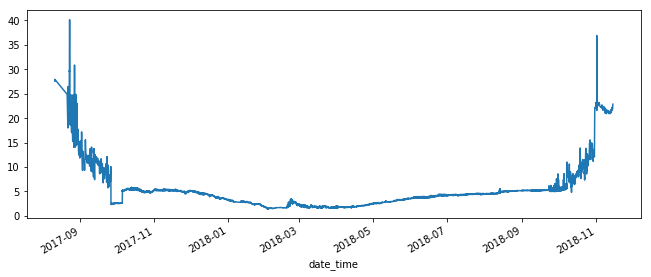

In [167]:
#quicklook of the first of 5 samples, final data will do statistical averageing
df.T1.plot(figsize=(11,4.25))

In [168]:
# calculate mean and std of 5 sample suite
df['ave'] = df[['T1', 'T2', 'T3', 'T4', 'T5']].mean(axis=1)
df['median'] = df[['T1', 'T2', 'T3', 'T4', 'T5']].median(axis=1)
df['std'] = df[['T1', 'T2', 'T3', 'T4', 'T5']].std(axis=1)

In [169]:
df.to_csv(unit_id_str + '.csv', columns=['ave','median','std'])

In [170]:
## resample if necessary, to 10min intervals, interpolating linearly forward but only one step
# doing it on the averaged data is ok especially if the std is low or 0
df['median'].resample('10T').mean().interpolate(limit=1)

date_time
2017-08-10 19:50:00    27.748481
2017-08-10 20:00:00    27.746504
2017-08-10 20:10:00          NaN
2017-08-10 20:20:00          NaN
2017-08-10 20:30:00          NaN
2017-08-10 20:40:00          NaN
2017-08-10 20:50:00          NaN
2017-08-10 21:00:00          NaN
2017-08-10 21:10:00          NaN
2017-08-10 21:20:00          NaN
2017-08-10 21:30:00          NaN
2017-08-10 21:40:00          NaN
2017-08-10 21:50:00          NaN
2017-08-10 22:00:00          NaN
2017-08-10 22:10:00          NaN
2017-08-10 22:20:00          NaN
2017-08-10 22:30:00          NaN
2017-08-10 22:40:00          NaN
2017-08-10 22:50:00          NaN
2017-08-10 23:00:00          NaN
2017-08-10 23:10:00          NaN
2017-08-10 23:20:00          NaN
2017-08-10 23:30:00          NaN
2017-08-10 23:40:00          NaN
2017-08-10 23:50:00          NaN
2017-08-11 00:00:00          NaN
2017-08-11 00:10:00          NaN
2017-08-11 00:20:00          NaN
2017-08-11 00:30:00          NaN
2017-08-11 00:40:00          NaN
